In [ ]:
                                                                                                    import numpy as np 
import pandas as pd 
import cv2
import os
from random import shuffle
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as k
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import seaborn as sns
from keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.layers import Add, ZeroPadding2D, Activation, BatchNormalization, Conv2D, MaxPool2D, Dropout, Dense, Input, concatenate, GlobalAveragePooling2D, AveragePooling2D, Flatten


In [2]:
def create_label(image_name):
    """ Create an one-hot encoded vector from image name """
    word_label = image_name.split('_')
    if word_label[0] == 'Basketball':
        return np.array([1,0,0,0,0,0])
    elif word_label[0] == 'Football':
        return np.array([0,1,0,0,0,0])
    elif word_label[0] == 'Rowing':
        return np.array([0,0,1,0,0,0])
    elif word_label[0] == 'Swimming':
        return np.array([0,0,0,1,0,0])
    elif word_label[0] == 'Tennis':
        return np.array([0,0,0,0,1,0])
    elif word_label[0] == 'Yoga':
        return np.array([0,0,0,0,0,1])

def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        norm_img = np.zeros((IMG_SIZE,IMG_SIZE))
        img_data = cv2.normalize(img_data,  norm_img, 0, 255, cv2.NORM_MINMAX)
        img_data = img_data.astype('float')
        training_data.append([np.array(img_data), create_label(img)])
    
    return training_data

def create_test_data():
    test_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        norm_img = np.zeros((IMG_SIZE,IMG_SIZE))
        img_data = cv2.normalize(img_data,  norm_img, 0, 255, cv2.NORM_MINMAX)
        img_data = img_data.astype('float')
        test_data.append([np.array(img_data), create_label(img)])
    
    
    shuffle(test_data)
    return test_data



In [3]:
TRAIN_DIR = '/kaggle/input/nn23-sports-image-classification/Train'
TEST_DIR = '/kaggle/input/nn23-sports-image-classification/Test'

size_train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = plt.imread(path)
        size_train_data.append(img_data.shape)

print(pd.Series(size_train_data).value_counts())



size_test_data = []
for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_data = plt.imread(path)
        size_test_data.append(img_data.shape)

print(pd.Series(size_test_data).value_counts())


100%|██████████| 1681/1681 [00:17<00:00, 97.87it/s] 


(224, 224, 3)      599
(408, 612, 3)      145
(180, 320, 3)       50
(183, 275, 3)       48
(240, 240, 3)       41
                  ... 
(240, 195, 3)        1
(612, 457, 3)        1
(1500, 2250, 3)      1
(258, 195, 3)        1
(377, 699, 3)        1
Length: 409, dtype: int64


100%|██████████| 688/688 [00:10<00:00, 67.02it/s] 

(408, 612, 3)      200
(224, 224, 3)       29
(612, 408, 3)       23
(183, 275, 3)       22
(306, 612, 3)       11
                  ... 
(1135, 2000, 3)      1
(1280, 1920, 3)      1
(628, 1200, 3)       1
(167, 301, 3)        1
(858, 1680, 3)       1
Length: 279, dtype: int64


In [4]:
IMG_SIZE = 224
MODEL_NAME = "[NN'23] Sports Image Classification"

class1_data = [] 
class2_data = []
class3_data = []
class4_data = []
class5_data = []
class6_data = []

list_visualize_classes = []

train_data = create_train_data()

for img in tqdm(train_data):
    if img[1][0] == 1:
        class1_data.append(img)
        list_visualize_classes.append('Basketball')
    elif img[1][1] == 1:
        class2_data.append(img)
        list_visualize_classes.append('Football')
    elif img[1][2] == 1:
        class3_data.append(img)
        list_visualize_classes.append('Rowing')
    elif img[1][3] == 1:
        class4_data.append(img)
        list_visualize_classes.append('Swimming')
    elif img[1][4] == 1:
        class5_data.append(img)
        list_visualize_classes.append('Tennis')
    elif img[1][5] == 1:
        class6_data.append(img)
        list_visualize_classes.append('Yoga')
        


shuffle(class1_data)    
shuffle(class2_data)
shuffle(class3_data)
shuffle(class4_data)
shuffle(class5_data)            
shuffle(class6_data)



100%|██████████| 1681/1681 [00:00<00:00, 460734.82it/s]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of Basketball Images:  196 Image
Number of Football Images:    400 Image
Number of Rowing Images:      202 Image
Number of Swimming Images:    240 Image
Number of Tennis Images:      185 Image
Number of Yoga Images:        458 Image


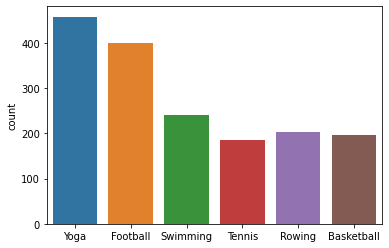

In [5]:
sns.countplot(list_visualize_classes)

print("Number of Basketball Images: ", len(class1_data), "Image")
print("Number of Football Images:   ", len(class2_data), "Image")
print("Number of Rowing Images:     ", len(class3_data), "Image")
print("Number of Swimming Images:   ", len(class4_data), "Image")
print("Number of Tennis Images:     ", len(class5_data), "Image")
print("Number of Yoga Images:       ", len(class6_data), "Image")



In [6]:
data = class1_data + class2_data + class3_data + class4_data + class5_data + class6_data

X_train = np.array([i[0] for i in data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array([i[1] for i in data])


print(X_train.shape)
print(y_train.shape)

(1681, 224, 224, 3)
(1681, 6)


In [7]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
datagen.fit(X_train)

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X




def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', )(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
  

    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    
    

    return model





Res_50_model = ResNet50(input_shape=(224, 224, 3))


headModel = Res_50_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1')(headModel)
headModel=Dense(128, activation='relu', name='fc2')(headModel)
headModel = Dense(6 ,activation='softmax', name='fc3')(headModel)
model = Model(inputs=Res_50_model.input, outputs=headModel)


Res_50_model.load_weights("/kaggle/input/resnet1/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

for layer in Res_50_model.layers:
    layer.trainable = False

check_point = k.callbacks.ModelCheckpoint(filepath="resnet_50.h5", monitor="val_acc", mode="max", save_best_only=True,)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train), validation_data=(X_train,y_train), 
                    epochs=10, batch_size=64, callbacks=[check_point])
model.save('model.h5')


Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 2.4609 - accuracy: 0.7222

In [16]:
saved = tf.keras.models.load_model('/kaggle/input/modelh5')
testing_data=[]
for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_data = cv2.imread(path)
        img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
        test_img = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        test_img = test_img.reshape(IMG_SIZE, IMG_SIZE, 3)
        norm_img = np.zeros((IMG_SIZE,IMG_SIZE))
        img_data = cv2.normalize(test_img,  norm_img, 0, 255, cv2.NORM_MINMAX)
        img_data = np.expand_dims(img_data, axis=0)
        prediction = saved.predict(img_data)[0]
        max_value = max(prediction)
        index = np.where(prediction == max_value)
        testing_data.append([img, index[0][0]])
        
with open('sport.csv','w+') as file:
 myfile = csv.writer(file)
 myfile.writerow(['image_name', 'label'])
 for i in range(len(testing_data)):
    myfile.writerow(testing_data[i])

100%|██████████| 688/688 [00:42<00:00, 16.21it/s]
